# <font color=purple>Anouk Vreeburg - Gender Recognition by Voice</font>

## Introduction

https://www.kaggle.com/primaryobjects/voicegender/home<br>For this assignment I am going to use the "Gender Recognition by Voice" dataset from Kaggle to predict the variable label (male or female). I will do this with a k-NN

Let's first look at the dataset:

In [102]:
import pandas as pd

In [103]:
df = pd.read_csv("voice.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

A lot of columns are unfamiliar for me, I decided to look for the definition online:

https://www.kaggle.com/laylasekali/exercice-1-voice-gender-recognition-layla-sekali<br>
"meanfreq: mean frequency (in kHz)<br>
sd: standard deviation of frequency<br>
median: median frequency (in kHz)<br>
Q25: first quantile (in kHz)<br>
Q75: third quantile (in kHz)<br>
IQR: interquantile range (in kHz)<br>
skew: skewness (see note in specprop description)<br>
kurt: kurtosis (see note in specprop description)<br>
sp.ent: spectral entropy<br>
sfm: spectral flatness<br>
mode: mode frequency<br>
centroid: frequency centroid (see specprop)<br>
peakf: peak frequency (frequency with highest energy)<br>
meanfun: average of fundamental frequency measured across acoustic signal<br>
minfun: minimum fundamental frequency measured across acoustic signal<br>
maxfun: maximum fundamental frequency measured across acoustic signal<br>
meandom: average of dominant frequency measured across acoustic signal<br>
mindom: minimum of dominant frequency measured across acoustic signal<br>
maxdom: maximum of dominant frequency measured across acoustic signal<br>
dfrange: range of dominant frequency measured across acoustic signal<br>
modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range<br>
label: male or female"

Looking at the definitions my first initial thoughts are that meanfreq, sd, skew, sfm could be the most compatible among the independent variables

Now that we now the meanings of the columns, let's look at the numbers that they can give. Also to get a more clear overview.

In [104]:
df.head(15) 

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


The next step is to clean the data, so that I can work with it and furthermore figure out which variables to take with me in predicting the label

## Data cleaning

Let's drop the rows with NaNs in them first, otherwise the kNN won't work

In [105]:
df = df.dropna()
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


It looks like no NaNs were found, as the rows are still the same number: 3168, so the data set was already clean.<br>

Let's now look at the variables I want to use.<br>
Label is the dependent variable and the one I want to predict, let's count them

In [106]:
df.value_counts("label")

label
female    1584
male      1584
dtype: int64

Since label is categorical, let's make a dummy out of it and put that dummy in the columns. *I need this for in a later step*

In [107]:
dummies = pd.get_dummies(df['label'])
df = pd.concat([df, dummies], axis=1)
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label,female,male
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male,0,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male,0,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male,0,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male,0,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male,0,1


I also need to choose the independent variables<br>
For that, I need to explore these variables more and look at which have the strongest correlation with the dependent variable. This will start exploratory data analysis

## Exploratory data analysis

Let's start with investigating the relationship between the dependent variable (label) with the other variables

https://stackoverflow.com/questions/20230326/retrieve-dataframe-of-all-but-one-specified-column<br>
The code below was made with the help from this link

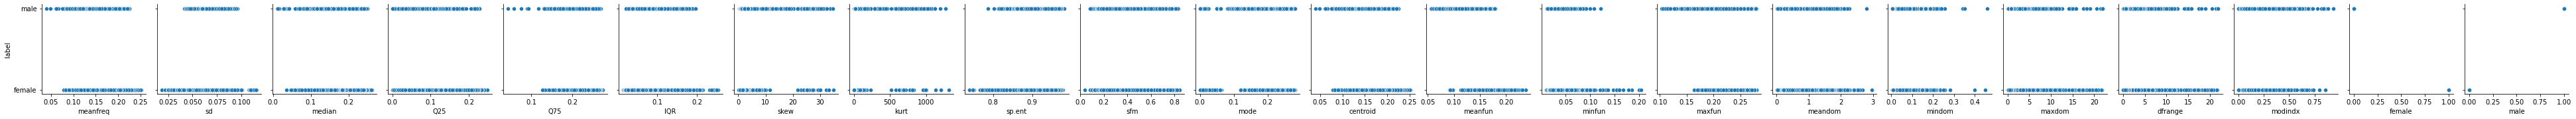

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, y_vars=["label"], x_vars=df.loc[:, df.columns != "label"])

When zooming in, we can kind of see that *meanfun* and *meanfreq* show the most differences in male and female

We can look beter at this data and their correlation with the dependent variable with a correlation matrix.<br>
Because dummy variables were made (female and male), the label will also be included in the matrix, and that is what I want, because we need to read their numbers.

In [109]:
df.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,female,male
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,...,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979,0.337415,-0.337415
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,...,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660,-0.479539,0.479539
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,...,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298,0.283919,-0.283919
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,...,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377,0.511455,-0.511455
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,...,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475,-0.066906,0.066906
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,...,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252,-0.618916,0.618916
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,...,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325,-0.036627,0.036627
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,...,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539,-0.087195,0.087195
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,...,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074,-0.490552,0.490552
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,...,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477,-0.357499,0.357499


As the powerpoint about correlation on team says:<br>

+ Weak: 0.1 - 0.3
+ Moderate: 0.3 - 0.6
+ Strong: > 0.6


The correlation matrix confirms that the strongest correlations with the label gender are *IQR (0.62)* and *meanfun (0.83)*.<br>
Moderate correlations are *meanfreq (0.34)*, *sd (0.48)*, *Q25 (0.51)*, *sp.ent (0.49)*, *sfm (0.36)* and *centroid (0.34)*.

For extra confirmation to use these as the independent variables, let's confirm them visually with a boxplot, as I think a boxplot is very easily and cleary to read when comparing two sides with each other

<AxesSubplot:xlabel='label', ylabel='IQR'>

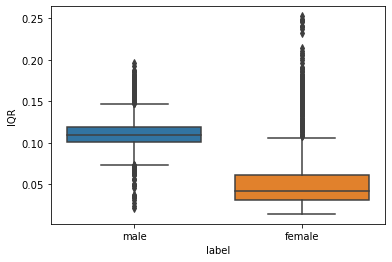

In [110]:
sns.boxplot(x='label', y='IQR', data=df)

<AxesSubplot:xlabel='label', ylabel='meanfun'>

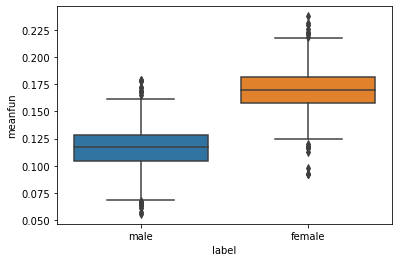

In [111]:
sns.boxplot(x='label', y='meanfun', data=df)

We can indeed see the differences clearly in the two strong correlated variables

<AxesSubplot:xlabel='label', ylabel='meanfreq'>

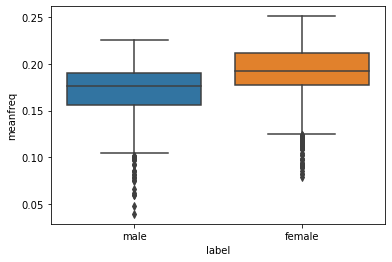

In [112]:
sns.boxplot(x='label', y='meanfreq', data=df)

<AxesSubplot:xlabel='label', ylabel='sd'>

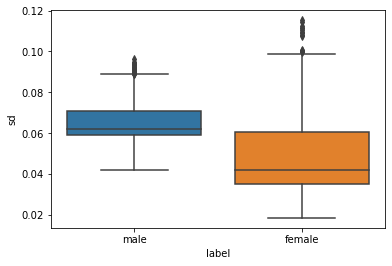

In [113]:
sns.boxplot(x='label', y='sd', data=df)

<AxesSubplot:xlabel='label', ylabel='Q25'>

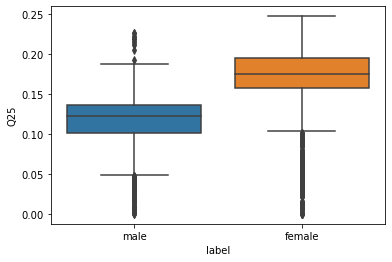

In [114]:
sns.boxplot(x='label', y='Q25', data=df)

<AxesSubplot:xlabel='label', ylabel='sp.ent'>

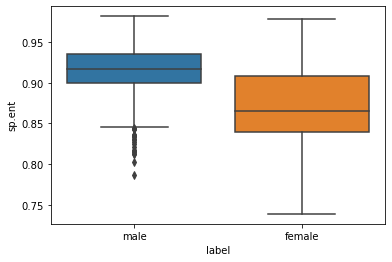

In [115]:
sns.boxplot(x='label', y='sp.ent', data=df)

<AxesSubplot:xlabel='label', ylabel='sfm'>

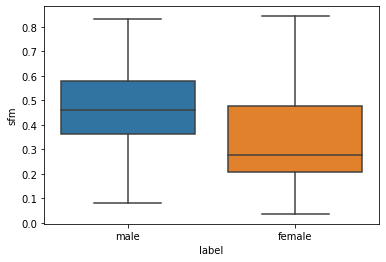

In [116]:
sns.boxplot(x='label', y='sfm', data=df)

<AxesSubplot:xlabel='label', ylabel='centroid'>

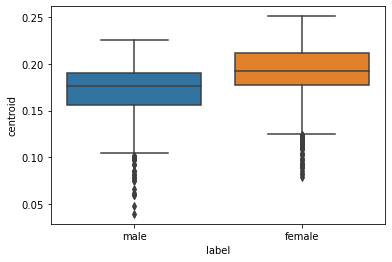

In [117]:
sns.boxplot(x='label', y='centroid', data=df)

The moderate correlations also confirms steady differences between the male and the female

Furthermore, because the independent variable only contains two meanings, it is difficult for plots to be made and to find non-linear or linear relationships with it. Thats why I shall not do that step<br>

In conclusion, I can tell the dependent and independent variables that I will be working with:<br>

+ dependent: the label
+ independent: IQR, meanfun, meanfreq, sd, Q25, sp.ent, sfm and centroid

Let's now remove unnecessary variables from the dataset, to prevent messeniss

In [118]:
df = df.drop(["median", "Q75", "skew", "kurt", "mode", "minfun", "maxfun", "meandom", "mindom", "maxdom", "dfrange", "modindx"], axis=1)

In [119]:
df

,meanfreq,sd,Q25,IQR,sp.ent,sfm,centroid,meanfun,label,female,male
0,0.059781,0.064241,0.015071,0.075122,0.893369,0.491918,0.059781,0.084279,male,0,1
1,0.066009,0.067310,0.019414,0.073252,0.892193,0.513724,0.066009,0.107937,male,0,1
2,0.077316,0.083829,0.008701,0.123207,0.846389,0.478905,0.077316,0.098706,male,0,1
3,0.151228,0.072111,0.096582,0.111374,0.963322,0.727232,0.151228,0.088965,male,0,1
4,0.135120,0.079146,0.078720,0.127325,0.971955,0.783568,0.135120,0.106398,male,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.049285,0.151859,0.962934,0.763182,0.131884,0.182790,female,1,0
3164,0.116221,0.089221,0.042718,0.162193,0.960716,0.709570,0.116221,0.188980,female,1,0
3165,0.142056,0.095798,0.033424,0.190936,0.946854,0.654196,0.142056,0.209918,female,1,0
3166,0.143659,0.090628,0.043508,0.176435,0.950436,0.675470,0.143659,0.172375,female,1,0


## Predictive model

As already told, I am building the model with k-nearest neighbor.<br>K-nearest neighbor is an algorithm based on machine learning. It is very easy to use. It calculates the distance of a new data point to all the other training data points. When for example taking the point (1,2), it will take the three nearest points (1,1 - 2,2 - 1,3) and it will assign a new point based on those three and the distance (for example: 2,2). Therefore a new data point will be born.<br>
So simply said, the kNN algorithm will help us predict the characteristic/attribute/number of the data point based on the numbers of its neighbors

Let's build the model, with X being the independent variables and Y the dependent.<br> Because the independent variables showed the greatest distance between male and female, they should show the model the most male/female characterics/attributes/numbers 

In [120]:
from sklearn.model_selection import train_test_split #We need this to split the data

X = df[['IQR', 'meanfun', 'meanfreq', 'sd', 'Q25', 'sp.ent', 'sfm']] #create the X matrix
y = df['label'] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

X_train.head() #show the head of the training set

,IQR,meanfun,meanfreq,sd,Q25,sp.ent,sfm
1866,0.174542,0.174179,0.141083,0.088698,0.043235,0.941751,0.601127
767,0.100853,0.100181,0.167021,0.057011,0.106603,0.908148,0.420416
2862,0.028535,0.179095,0.234486,0.034413,0.223822,0.813883,0.166600
1064,0.105827,0.138659,0.197073,0.057609,0.138016,0.911062,0.322959
270,0.108663,0.108932,0.142018,0.071383,0.094235,0.940602,0.613985


In [121]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn = KNeighborsClassifier() #create a KNN-classifier with 5 neighbors (default)
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data

In [122]:
knn.score(X_test, y_test) #calculate the fit on the *test* data

0.9705573080967402

The model is able to predict 97% of the label with accuracy. Let's test this in evaluation

## Evaluation

So, the accuracy of the kNN prediction model is:

In [123]:
knn.score(X_test, y_test) 

0.9705573080967402

97%<br>
We can test this with the Naive Bayes model, as explained in lesson 6.<br> It calculates the probability that a "..." belongs to a certain category

In [124]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb = nb.fit(X_train, y_train)

In [125]:
df["predict"] = nb.predict(X)
print(df[["female", "male", "label", "predict"]].head(60))

    female  male label predict
0        0     1  male    male
1        0     1  male    male
2        0     1  male    male
3        0     1  male    male
4        0     1  male    male
5        0     1  male    male
6        0     1  male    male
7        0     1  male    male
8        0     1  male    male
9        0     1  male    male
10       0     1  male    male
11       0     1  male    male
12       0     1  male    male
13       0     1  male    male
14       0     1  male    male
15       0     1  male    male
16       0     1  male    male
17       0     1  male    male
18       0     1  male    male
19       0     1  male    male
20       0     1  male    male
21       0     1  male    male
22       0     1  male    male
23       0     1  male    male
24       0     1  male    male
25       0     1  male    male
26       0     1  male    male
27       0     1  male    male
28       0     1  male    male
29       0     1  male  female
30       0     1  male    male
31      

From the 60 answers, we can see that 4/60 are predicted wrong, which is around 6%, so 93% is guessed correctly. Which is close to 97%, so we can see that the accuracy and thereby the kNN model worked

Aside from accuracy, we can also look at precision and recall. Let's create a confusion matrix for that

In [126]:
from sklearn.metrics import confusion_matrix
y_test_pred = knn.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
cm

array([[442,  15],
       [ 13, 481]])

In [127]:
conf_matrix = pd.DataFrame(cm, index=['male', 'female'], columns = ['male (predicted)', 'female (predicted)']) 
conf_matrix

,male (predicted),female (predicted)
male,442,15
female,13,481


The way to read this is that from the males, 442 are correctly predicted and 13 are wrong. For the females, 481 is correctly predicted and 15 are wrong

To get precision, I need to do: correctly predicted males or females / total predicted

+ Males precision:

In [128]:
(442)/(442+13)

0.9714285714285714

+ Females precision:

In [129]:
(481)/(481+15)

0.969758064516129

The number of precision is around 97% for males and females. It tells how "precise" the model is in saying if the person is male or female

As for recall, I need to: correctly predicted males or females / total actual

+ Males recall:

In [130]:
(442)/(442+15)

0.9671772428884027

+ Females recall:

In [131]:
(481)/(481+13)

0.9736842105263158

Also recall is for both around 97%, it tells how many labeled people does the model "recall"

Accuracy, precision and recall are all around 97%. This means that the model is able to predict a very steady outcome, it is able to predict male or female pretty equally

To get a full overview, let's create a Markdown cell. Made with help from example code

In [132]:
from sklearn.metrics import classification_report

for i in range(1,11):
    knn_new = KNeighborsClassifier(n_neighbors = i) #make a new kNN model with i (1-10) neighbors
    knn_new = knn_new.fit(X_train, y_train) #fit new model on train data
    y_test_pred_new = knn_new.predict(X_test) #predict using new model, with test data
    print(f"With {i} neighbors the result is:")
    print(classification_report(y_test, y_test_pred_new)) #use a built-in function to print out accuracy, precision and recall

With 1 neighbors the result is:
              precision    recall  f1-score   support

      female       0.97      0.97      0.97       457
        male       0.97      0.97      0.97       494

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951

With 2 neighbors the result is:
              precision    recall  f1-score   support

      female       0.96      0.98      0.97       457
        male       0.98      0.96      0.97       494

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951

With 3 neighbors the result is:
              precision    recall  f1-score   support

      female       0.97      0.98      0.97       457
        male       0.98      0.97      0.98       494

    accuracy                           0.97       951
   macro avg       0.97      0.9

We can hereby see the differences how the model would predict the accuracy, precision and recall if it had 1 neightbor or if it had up to 10.<br>
The model appears to be pretty much the same with different amount of neighbors

## Conclusion

I can conclude that the kNN model was very victorious in predicting the label. By taking this dataset step by step I was able to easily get to a successful model and evaluation. With choosing the most, and also a good amount, of compatible variables, the model was able to make accurate new points for predicting the label. In the end, getting 97% is a good score to get. Overall, I would consider the gender recognition with kNN a success.